1.数据摘要和可视化

In [18]:
import pandas as pd
from sklearn.impute import KNNImputer

In [ ]:
1.1数据摘要

In [11]:
df = pd.read_csv('C:/Users/lxw/Downloads/archive/reduced_dataset-release.csv', dtype={'TEXTBLOB_POLARITY': str}, low_memory=False)
df['TEXTBLOB_POLARITY'] = pd.to_numeric(df_csv['TEXTBLOB_POLARITY'], errors='coerce')
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,NaN,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [12]:
nominal_attributes = ['STOCK']  # 标称属性列表
for attribute in nominal_attributes:
    print(df[attribute].value_counts())

STOCK
Nike       3797
79.6       2710
Reuters    2482
Apple      2238
eBay       2063
           ... 
37.52         1
1201.26       1
413.5         1
108.25        1
81.86         1
Name: count, Length: 2696, dtype: int64


In [13]:
# 数值属性，给出5数概括及缺失值的个数
numeric_attributes = ['LAST_PRICE', '1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN',
                      'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D', 'LSTM_POLARITY', 'TEXTBLOB_POLARITY']
summary = df[numeric_attributes].describe()
missing_values_count = df.isnull().sum()
print(summary)
print("\nMissing values count:")
print(missing_values_count)

          LAST_PRICE  1_DAY_RETURN  2_DAY_RETURN  3_DAY_RETURN  7_DAY_RETURN  \
count   85176.000000  85176.000000  85176.000000  8.517600e+04  8.517600e+04   
mean      229.142895      0.004375      0.007293  5.891352e+06  2.020673e+06   
std      3227.736241      0.022527      0.032164  1.103918e+07  6.446903e+06   
min        -0.173554     -0.177851     -0.204959 -1.778512e-01 -2.049587e-01   
25%        -0.000414     -0.005989     -0.009848  0.000000e+00  3.386809e-02   
50%         0.009971      0.001119      0.003162  3.743719e-02  2.051700e+01   
75%        49.972500      0.013603      0.022654  7.943443e+06  5.266800e+01   
max    165500.000000      0.243639      0.267113  3.081068e+08  1.439475e+08   

          PX_VOLUME  VOLATILITY_10D  VOLATILITY_30D  TEXTBLOB_POLARITY  
count  8.517600e+04    85171.000000    85165.000000       27073.000000  
mean   4.094358e+06       11.883457        7.146620           0.077053  
std    1.036332e+07       14.389947       12.050566         

1.2数据可视化

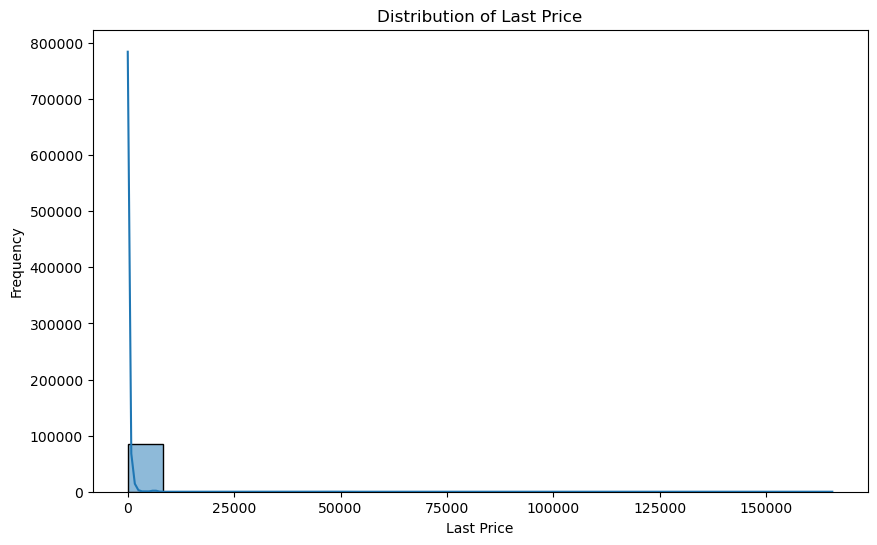

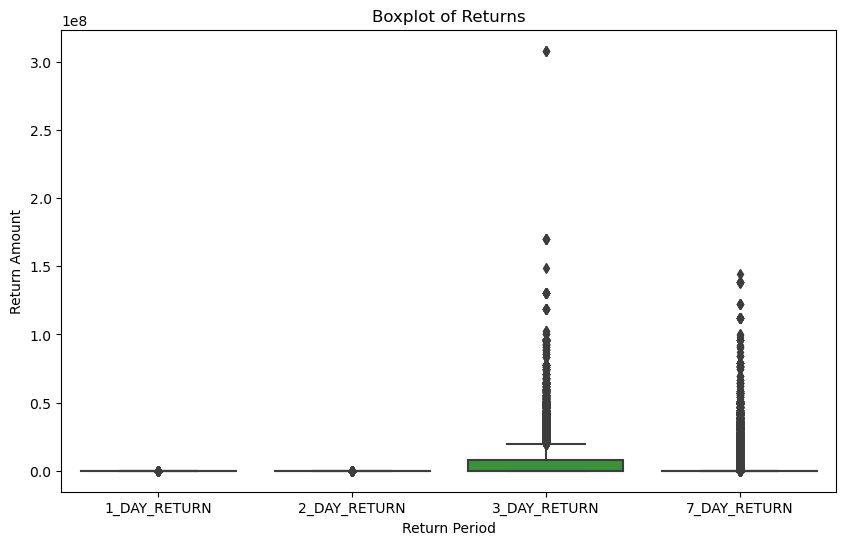

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['LAST_PRICE'], bins=20, kde=True)
plt.title('Distribution of Last Price')
plt.xlabel('Last Price')
plt.ylabel('Frequency')
plt.show()

# 盒图
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']])
plt.title('Boxplot of Returns')
plt.xlabel('Return Period')
plt.ylabel('Return Amount')
plt.show()


2.数据缺失处理

In [61]:

numeric_attributes = ['LAST_PRICE', '1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN',
                      'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D', 'LSTM_POLARITY', 'TEXTBLOB_POLARITY']
df[numeric_attributes] = df[numeric_attributes].apply(pd.to_numeric, errors='coerce')


# 从相关系数计算中排除非数值列
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# 1. 将缺失部分剔除
# 3. 将缺失部分剔除
df_dropna = df.dropna()

# 用最高频率值来填补缺失值
df_fillna_mode = df.fillna(df.mode().iloc[0])

In [62]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Column '{column}' contains non-numeric values.")

# 从相关系数计算中排除非数值列
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 计算属性之间的相关系数
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

Column 'Unnamed: 0' contains non-numeric values.
Column 'TWEET' contains non-numeric values.
Column 'STOCK' contains non-numeric values.
Column 'DATE' contains non-numeric values.
Column 'MENTION' contains non-numeric values.
                   LAST_PRICE  1_DAY_RETURN  2_DAY_RETURN  3_DAY_RETURN  \
LAST_PRICE           1.000000     -0.013310     -0.013472     -0.037885   
1_DAY_RETURN        -0.013310      1.000000      0.734714      0.196885   
2_DAY_RETURN        -0.013472      0.734714      1.000000      0.269247   
3_DAY_RETURN        -0.037885      0.196885      0.269247      1.000000   
7_DAY_RETURN        -0.022251     -0.037411     -0.063732     -0.167271   
PX_VOLUME            0.016460     -0.021278     -0.026231     -0.210847   
VOLATILITY_10D       0.067075     -0.051252     -0.068032     -0.435475   
VOLATILITY_30D       0.099773     -0.045195     -0.039004     -0.313782   
LSTM_POLARITY        0.017529      0.028633      0.023134      0.028935   
TEXTBLOB_POLARITY    0.0

通过属性的相关关系来填补缺失值
由上述相关系数可知相关关系系数基本很低，因此不做此步骤



In [ ]:
通过数据对象之间的相似性来填补缺失值

In [63]:
from sklearn.impute import KNNImputer

# 选择所有数值类型的列
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 删除字符串列
df_numeric = df[numeric_columns]

# 创建 KNN 填充器
imputer = KNNImputer(n_neighbors=5)

# 使用 KNN 填充缺失值
df_filled_with_knn = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)



In [69]:
df_diff = df_filled_with_knn - df


# 输出差异部分
print("Difference between original and filled data:")
import numpy as np

# 找到不为 NaN 和 0 的地方的索引
not_nan_zero_indices = np.where((df_diff != 0) & (~np.isnan(df_diff)))

# 输出不为 NaN 和 0 的地方的值及其索引
for i in range(len(not_nan_zero_indices[0])):
    row_idx = not_nan_zero_indices[0][i]
    col_idx = not_nan_zero_indices[1][i]
    print(f"Value at ({row_idx}, {col_idx}): {df_diff.iloc[row_idx, col_idx]}")


Difference between original and filled data:
